# Titanic Prediction

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pandas config
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

# Read the data
train_init = pd.read_csv('./data/train.csv')

## Data Exploratory Analysis

In [3]:
train = train_init.copy()

## Shape
print('\n Shape of train data')
print(train.shape)

## Head
print('\n First 10 rows of train data')
print(train.head(10))

## Info
print('\n Info of train data')
print(train.info())

## Is Null Count
print('\n Null Count of train data')
print(train.isnull().sum())


 Shape of train data
(891, 12)

 First 10 rows of train data
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5            6

/var/folders/tp/f57ctzbd7xx01q_3pylbmjr80000gn/T/ipykernel_59960/3007111404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=train, stat='percent', palette='viridis')


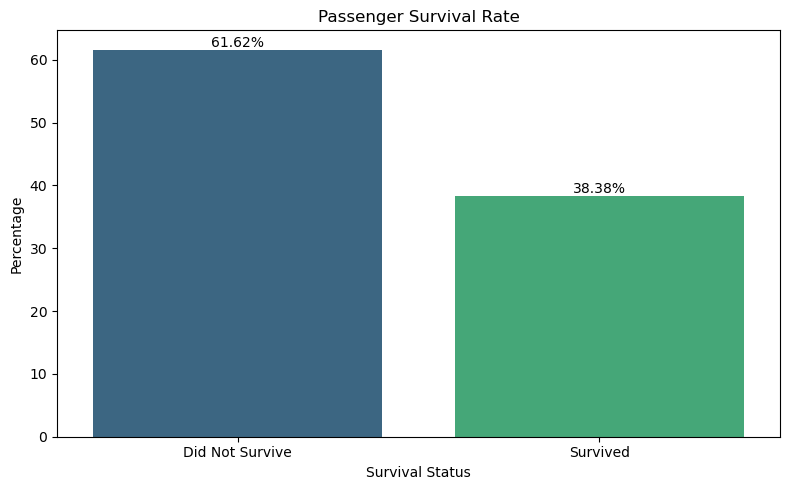

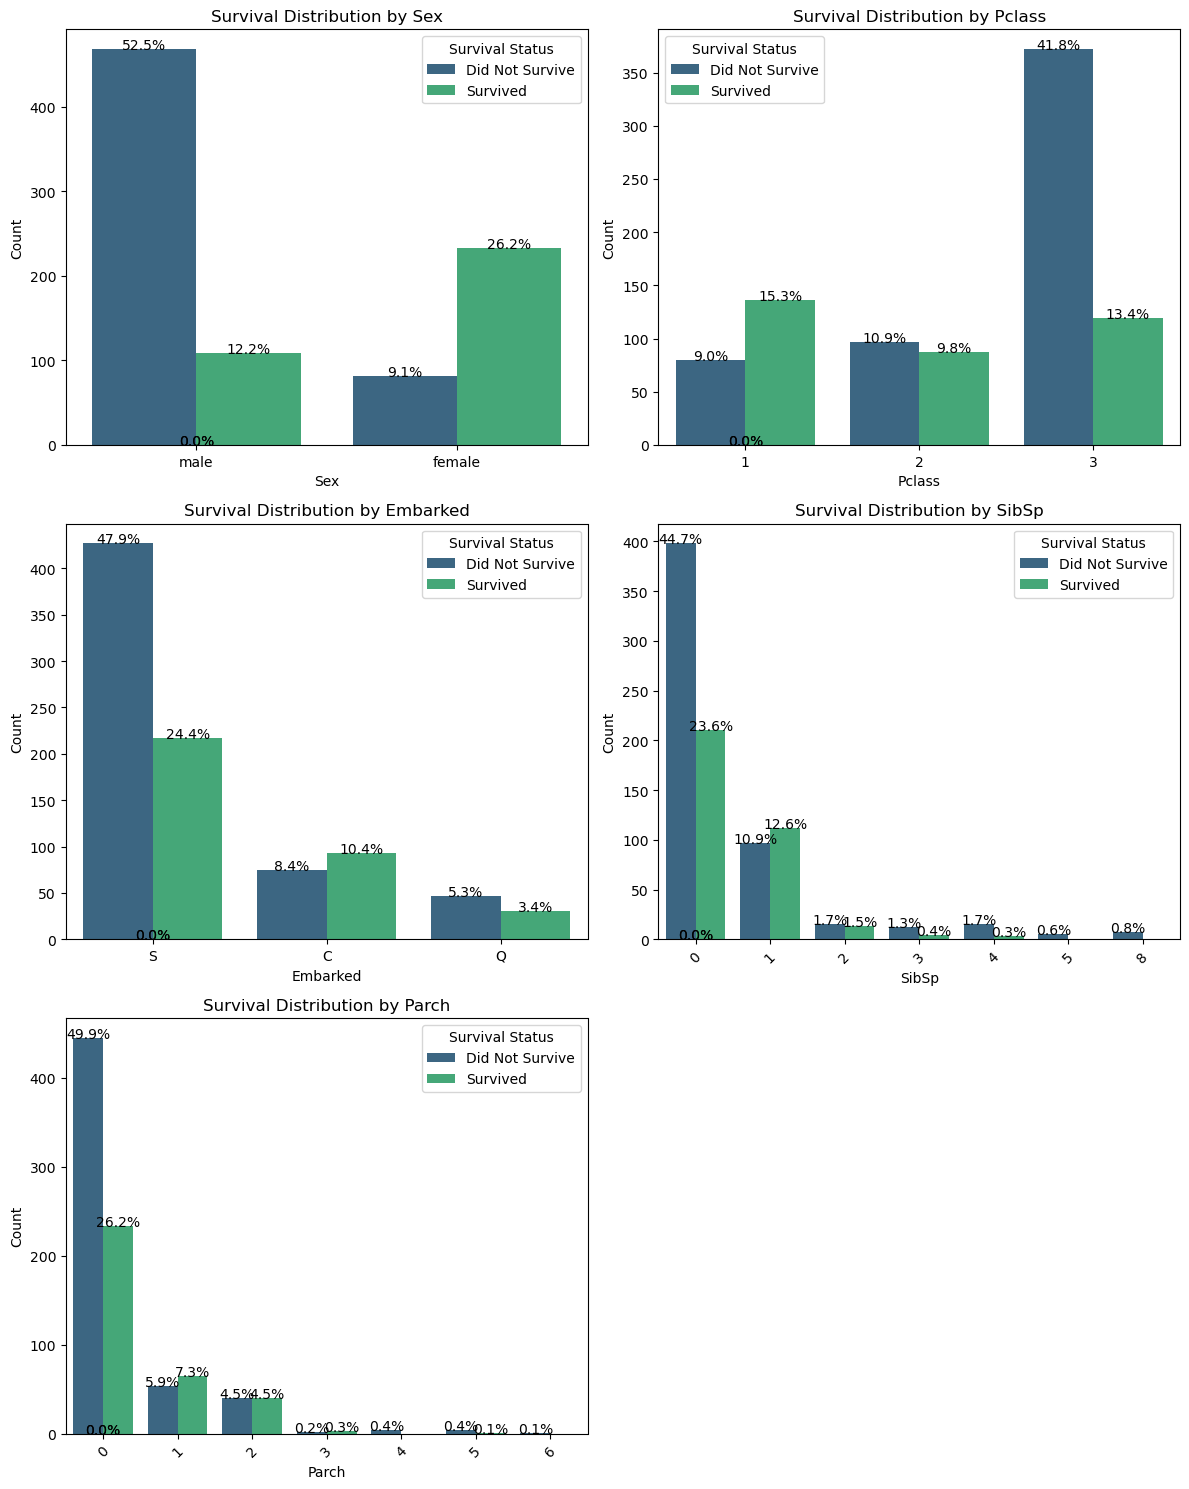

In [4]:
# Create simple survival distribution plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=train, stat='percent', palette='viridis')

# Add percentage labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

# Basic labels
plt.title('Passenger Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

plt.tight_layout()

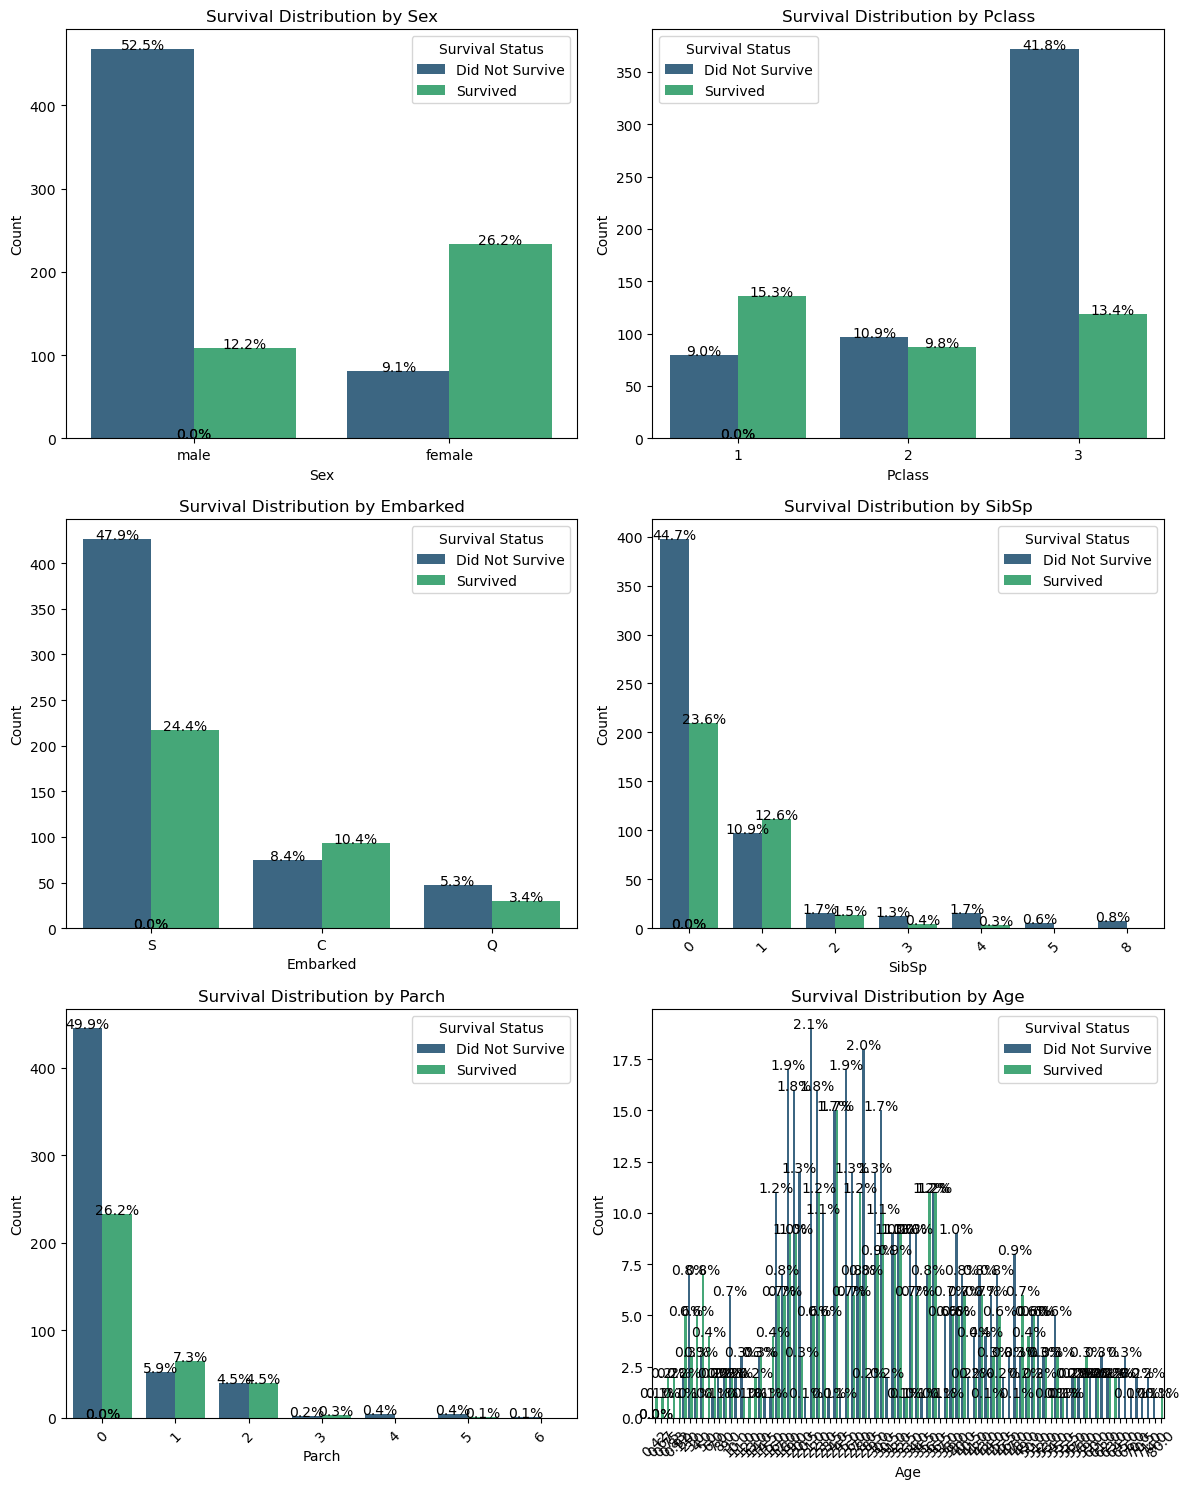

In [6]:

from modules.surv_plot import sv_plot 
sv_plots = sv_plot(train)
sv_plots.sv_countplot(['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch'])

In [13]:
## Feature Engineering
feated_train = train.copy()

feated_train.fillna({'Age': feated_train['Age'].median()}, inplace=True)
feated_train.fillna({'Embarked': feated_train['Embarked'].mode()[0]}, inplace=True)
feated_train.fillna({'Fare': feated_train['Fare'].median()}, inplace=True)


feated_train['FamilySize'] = feated_train['SibSp'] + feated_train['Parch'] + 1 
feated_train['IsAlone'] = (feated_train['FamilySize'] == 1).astype(int)

# Bin Age Groups 0-10
feated_train['AgeBin'] = pd.cut(feated_train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
feated_train['FareBand'] = pd.qcut(feated_train['Fare'], 3, labels=["Low", "Medium", "High"])

# Encoding categorical variables like Sex and Embarked
feated_train['Sex'] = feated_train['Sex'].map({'male': 1, 'female': 0})
feated_train['Embarked'] = feated_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop columns
feated_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'], axis=1, inplace=True)

feated_train

/var/folders/tp/f57ctzbd7xx01q_3pylbmjr80000gn/T/ipykernel_59960/968602081.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feated_train['Embarked'].fillna(feated_train['Embarked'].mode()[0], inplace=True)
/var/folders/tp/f57ctzbd7xx01q_3pylbmjr80000gn/T/ipykernel_59960/968602081.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,AgeBin,FareBand
0,0,3,1,1,0,0,2,0,20-30,Low
1,1,1,0,1,0,1,2,0,30-40,High
2,1,3,0,0,0,0,1,1,20-30,Low
3,1,1,0,1,0,0,2,0,30-40,High
4,0,3,1,0,0,0,1,1,30-40,Low
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,1,1,20-30,Medium
887,1,1,0,0,0,0,1,1,10-20,High
888,0,3,0,1,2,0,4,0,20-30,Medium
889,1,1,1,0,0,1,1,1,20-30,High
